In [ ]:
import torch
from torch import nn #nn contains all Pytorch neural networks tools
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#data
bias=0.5
weight=0.1
X=torch.arange(0,1000,10).unsqueeze(1)
y=bias+weight*X

In [ ]:
len(X),len(y)

(100, 100)

In [ ]:
#splitting data into training and test sets
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train)

(80, 80)

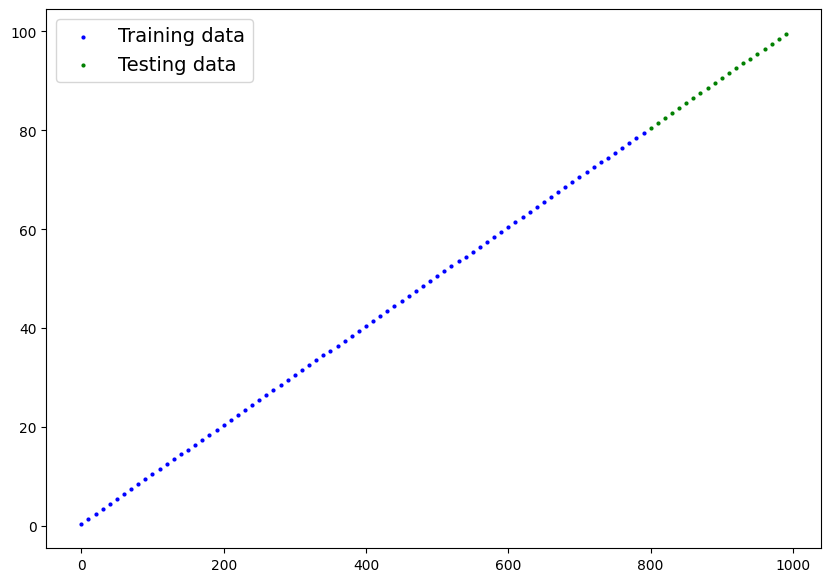

In [ ]:
# visulaize the data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14});

plot_predictions()

In [ ]:
# Building Model
class LinearRegressionModel(nn.Module): # almost everything inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float))
        self.bias=nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))

    # Forward defines the computation
    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.weights*x+self.bias
#

In [ ]:
# What's inside a model to check `.parmeters()`
torch.manual_seed(42)
model_0=LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#List named paramenters

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Making Predictions
with torch.inference_mode():
    y_preds=model_0(X_test)
#Same as inference but has disadvantages
# with torch.no_grad():
#     y_preds=model_0(X_test)
y_preds[:5],y_train[:5],y_test[:5]

(tensor([[269.4811],
         [272.8480],
         [276.2149],
         [279.5818],
         [282.9487]]),
 tensor([[0.5000],
         [1.5000],
         [2.5000],
         [3.5000],
         [4.5000]]),
 tensor([[80.5000],
         [81.5000],
         [82.5000],
         [83.5000],
         [84.5000]]))

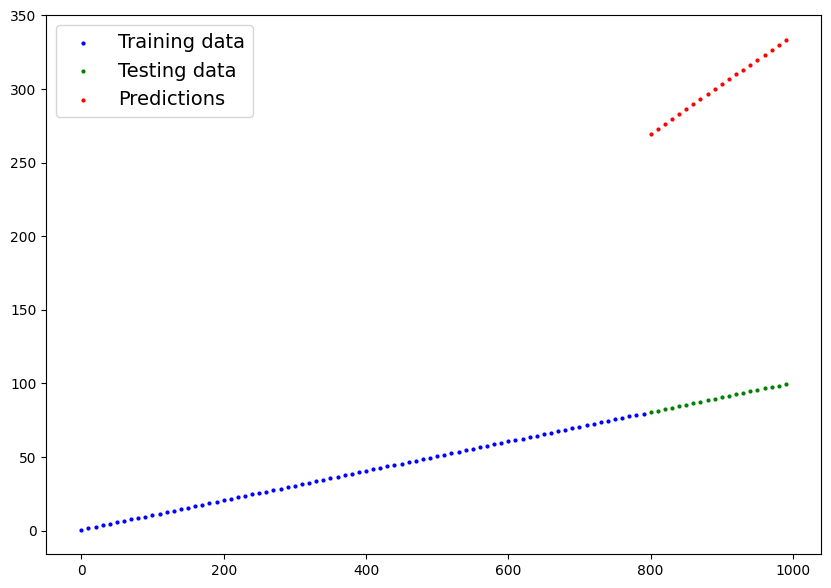

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
#Mean Absolute Error
torch.mean(torch.abs(y_preds-y_test))
# Or you can use L1loss
loss_fn=nn.L1Loss()
loss=loss_fn(y_preds,y_test)
loss

#setup the optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.0001)
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Building a Training loop
epochs=1000 #loops through the data
#Tracking differenct values
epoch_count=[]
loss_values=[]
test_loss_values=[]
#Loop
for epoch in range(epochs):
    model_0.train() #train mode sets all parameters that requires gradients to require gradients
    #Forward Pass
    y_preds=model_0(X_train)
    #Calculate Loss
    loss=loss_fn(y_preds,y_train)
    #Optimizer zero grad
    optimizer.zero_grad()
    #Backpropagation on loss
    loss.backward()
    #Step the Optimizer (Perform gradient descent)
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        y_preds=model_0(X_test)
        test_loss=loss_fn(y_preds,y_test)
    if epoch % 10==0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {loss}")
        print(model_0.state_dict())



Epoch: 0 | Loss: 0.07110156863927841 | Test Loss: 0.07110156863927841
OrderedDict([('weights', tensor([0.1394])), ('bias', tensor([0.4794]))])
Epoch: 10 | Loss: 0.07108764350414276 | Test Loss: 0.07108764350414276
OrderedDict([('weights', tensor([0.1394])), ('bias', tensor([0.4794]))])
Epoch: 20 | Loss: 0.07107658684253693 | Test Loss: 0.07107658684253693
OrderedDict([('weights', tensor([0.1394])), ('bias', tensor([0.4794]))])
Epoch: 30 | Loss: 0.07106399536132812 | Test Loss: 0.07106399536132812
OrderedDict([('weights', tensor([0.1394])), ('bias', tensor([0.4794]))])
Epoch: 40 | Loss: 0.07105159759521484 | Test Loss: 0.07105159759521484
OrderedDict([('weights', tensor([0.1394])), ('bias', tensor([0.4795]))])
Epoch: 50 | Loss: 0.07104034721851349 | Test Loss: 0.07104034721851349
OrderedDict([('weights', tensor([0.1394])), ('bias', tensor([0.4795]))])
Epoch: 60 | Loss: 0.07102642208337784 | Test Loss: 0.07102642208337784
OrderedDict([('weights', tensor([0.1394])), ('bias', tensor([0.479

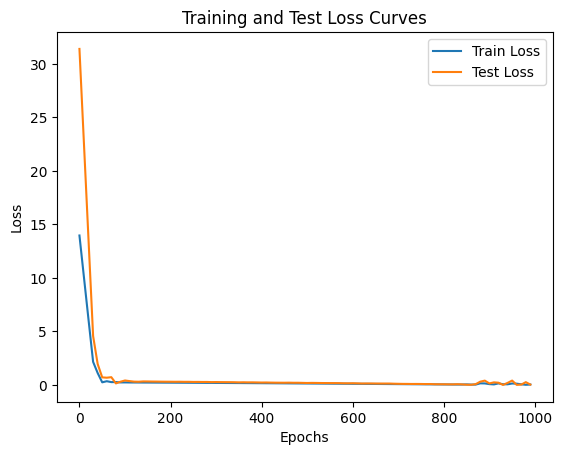

In [ ]:
#Plot the loss curve
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train Loss")
plt.plot(epoch_count,test_loss_values,label="Test Loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

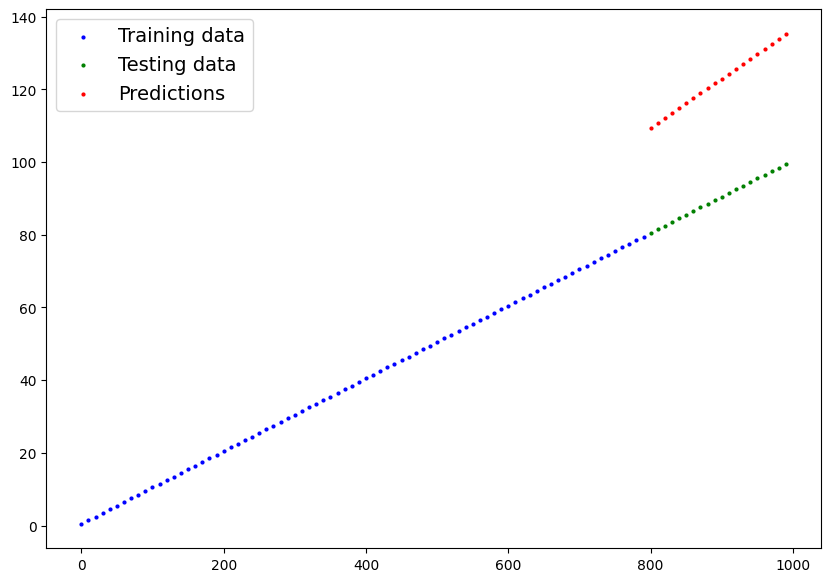

In [ ]:
plot_predictions(predictions=y_preds)

##Saving a model in Pytorch

Three method for saving and loading:

1. `torch.save()` - allows you to save object python pickle format
2. `torch.load` - allows to load a saved pytorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load model's saved state dictionary

In [ ]:
# Saving our model
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="01_pytorch_workflow.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0,f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow.pth


In [ ]:
#Loading our model
loaded_model_0=torch.load(f=MODEL_SAVE_PATH)
loaded_model_0.state_dict()
#If just saving state_dict then first create a model instance and then load the state_dict in it

<ipython-input-16-9cd52f2f4b98>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0=torch.load(f=MODEL_SAVE_PATH)


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer=nn.Linear(in_features=1,
                                    out_features=1)
        # Forward defines the computation
    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.linear_layer(x)



In [ ]:
weight=0.3
bias=0.9
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.9000],
         [0.9060],
         [0.9120],
         [0.9180],
         [0.9240],
         [0.9300],
         [0.9360],
         [0.9420],
         [0.9480],
         [0.9540]]))

In [ ]:
train_split=int((0.8*len(X)))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train)

(40, 40)

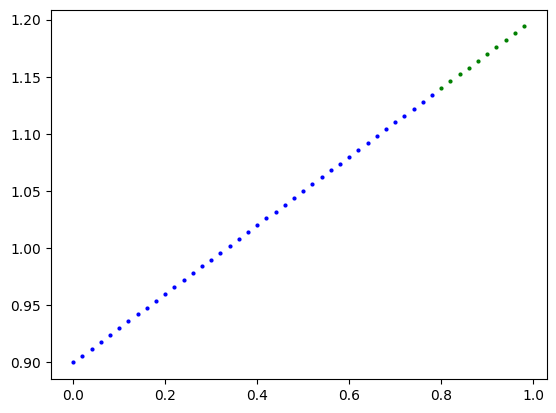

In [ ]:
plt.scatter(X_train,y_train,c="b",s=4,label="Training Data")
plt.scatter(X_test,y_test,c="g",s=4,label="Testing Data")

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  def forward(self,X):
    return self.weight*X+bias

In [ ]:
torch.manual_seed(42)
model_1=LinearRegressionModel()
model_1.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode():
  y_preds=model_1(X_test)

y_preds

tensor([[1.1694],
        [1.1761],
        [1.1828],
        [1.1896],
        [1.1963],
        [1.2030],
        [1.2098],
        [1.2165],
        [1.2232],
        [1.2300]])

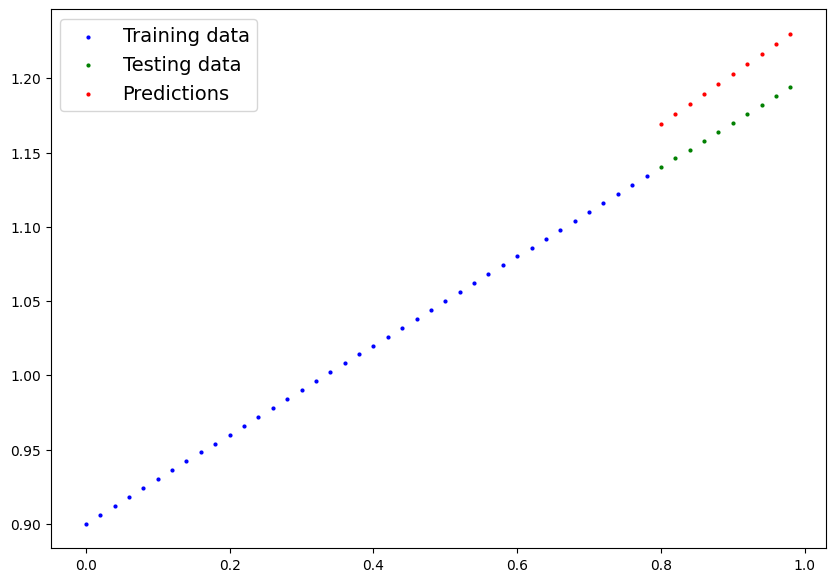

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
loss_fn=nn.L1Loss()
loss=loss_fn(y_preds,y_test)
loss

optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.01)
list(model_1.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

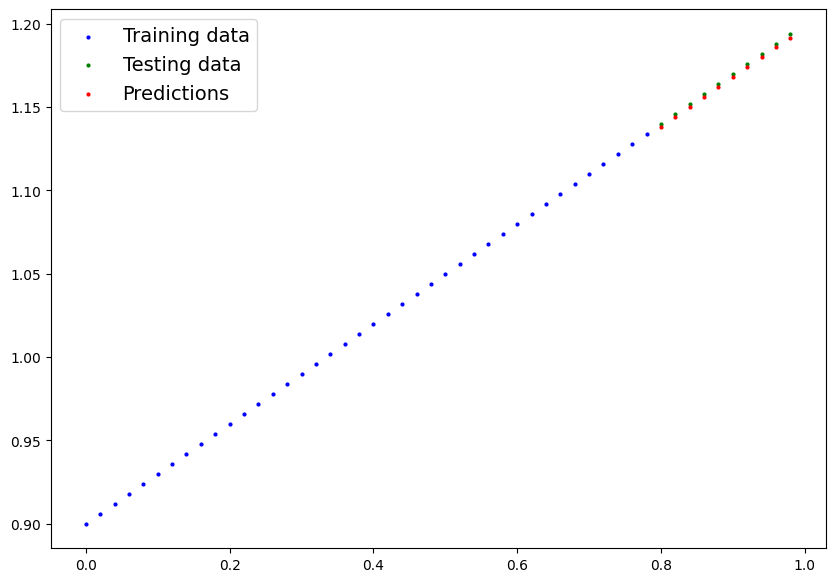

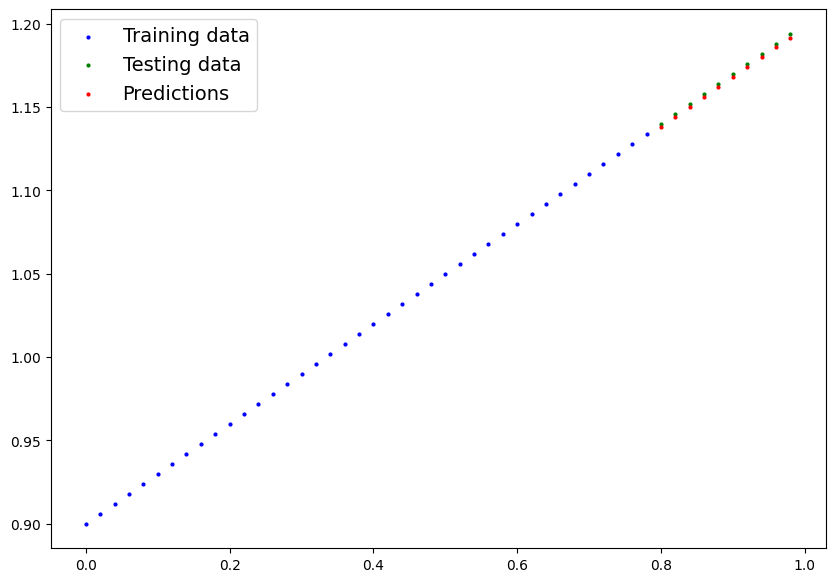

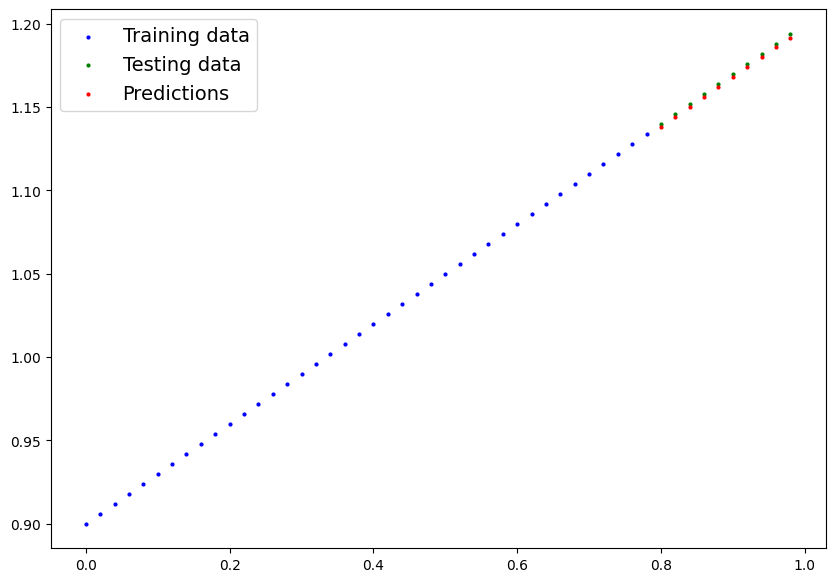

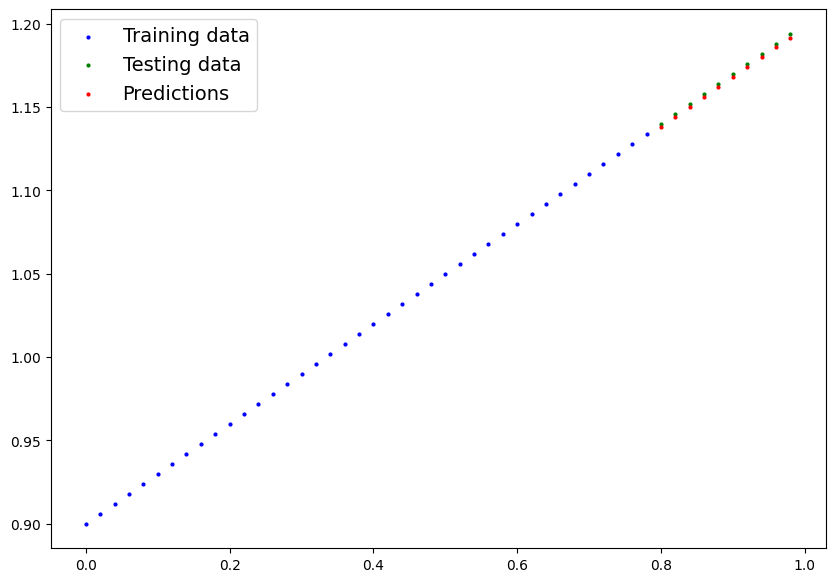

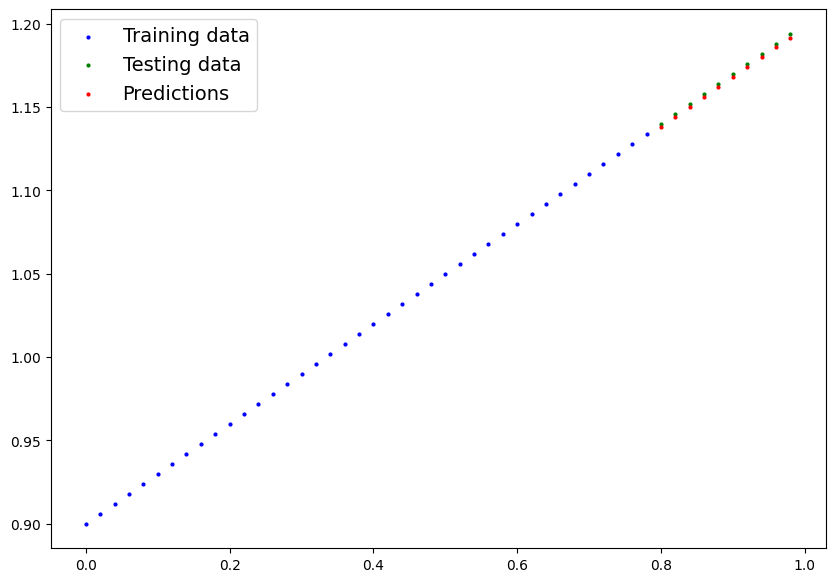

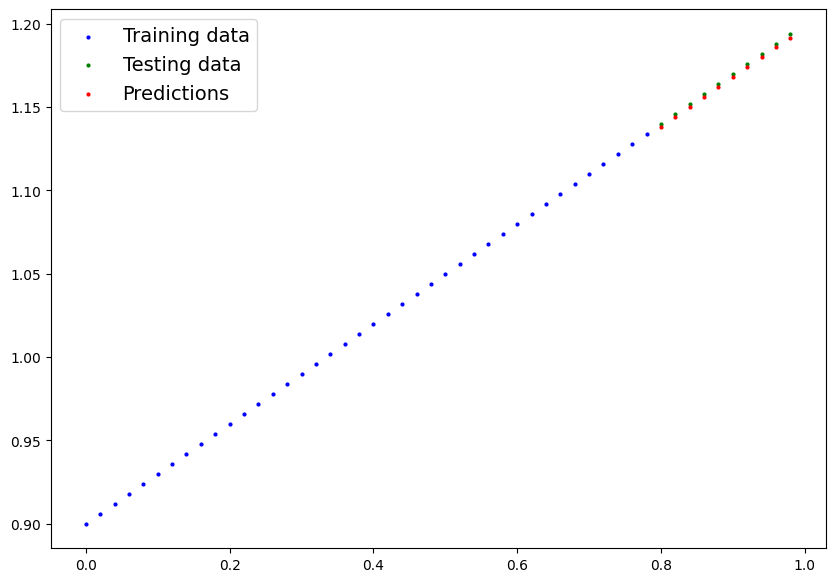

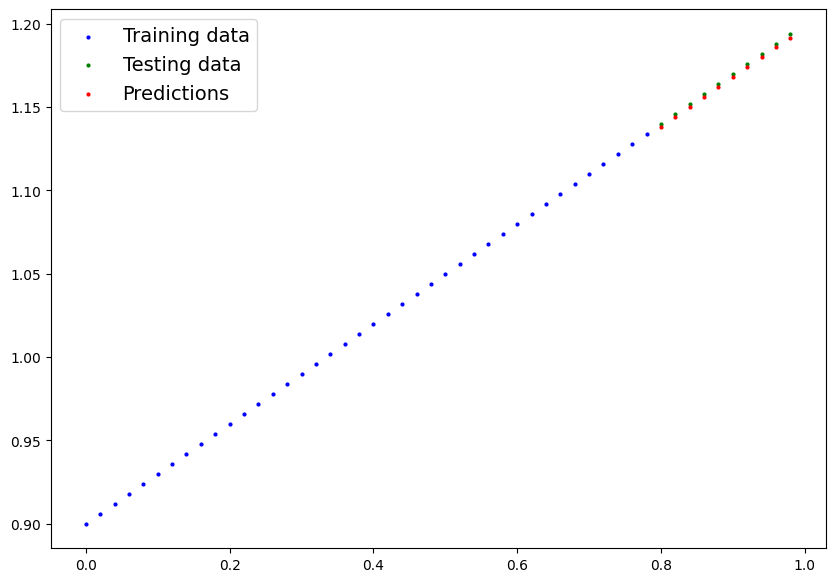

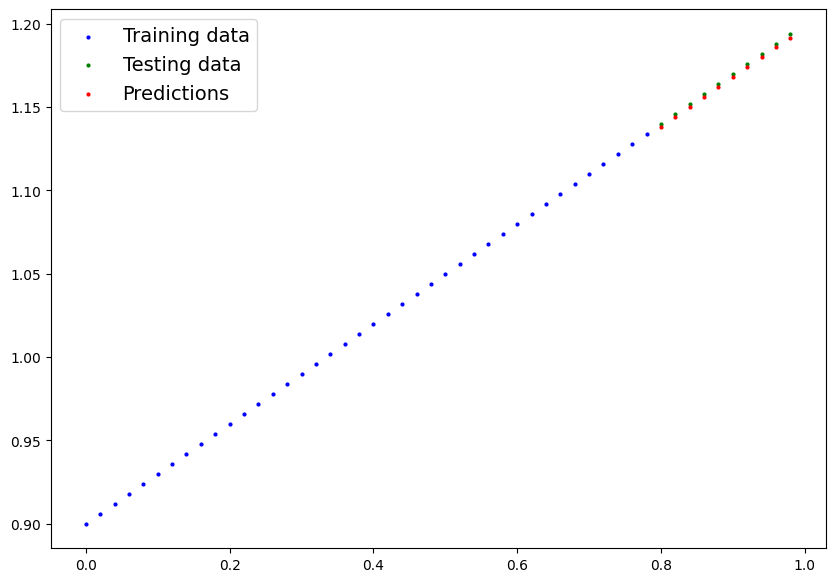

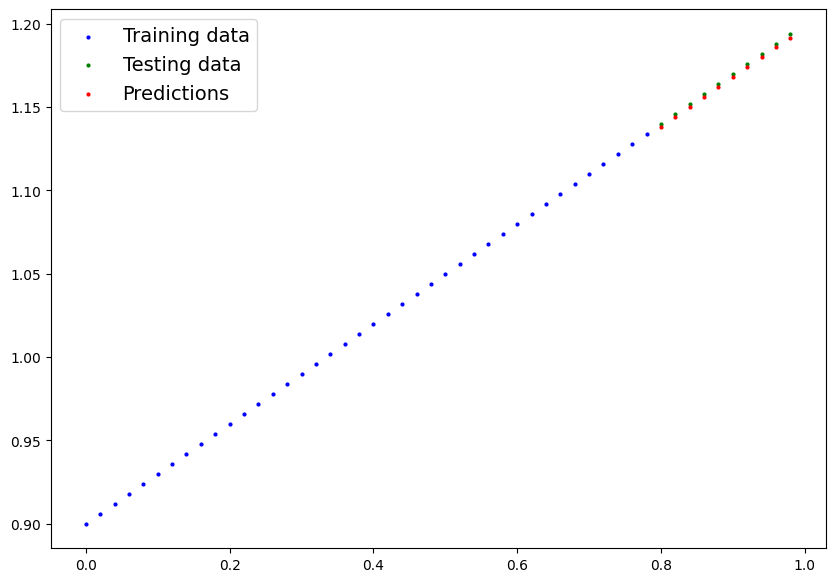

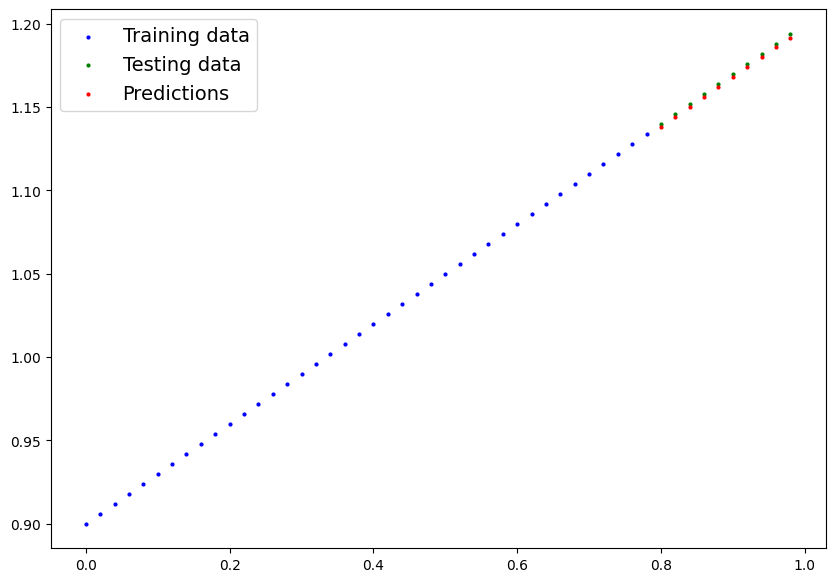

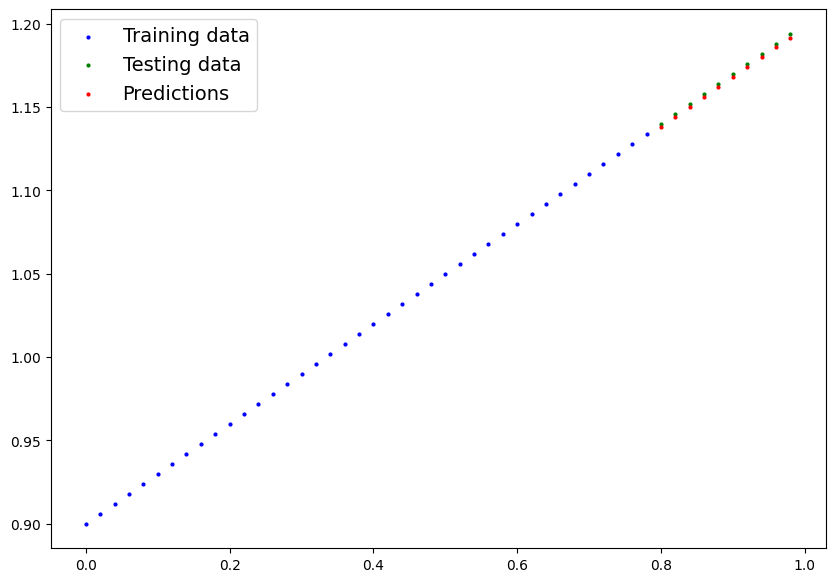

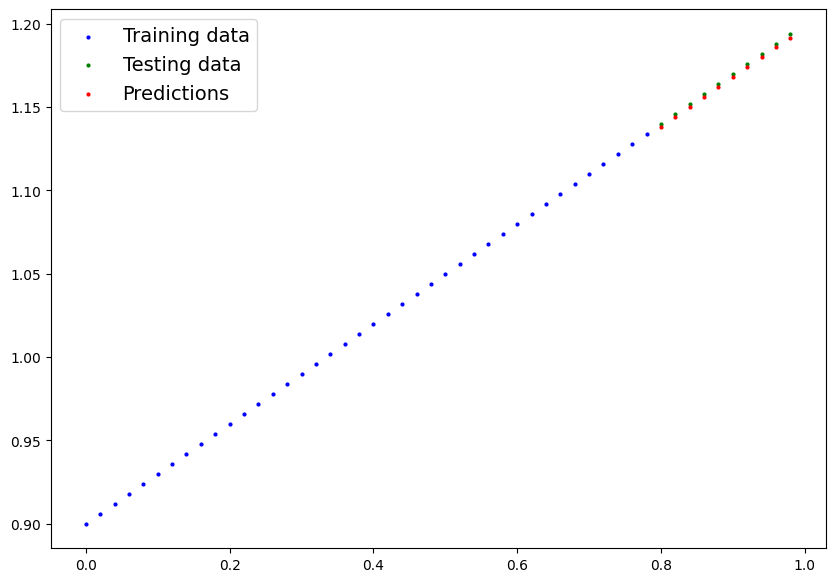

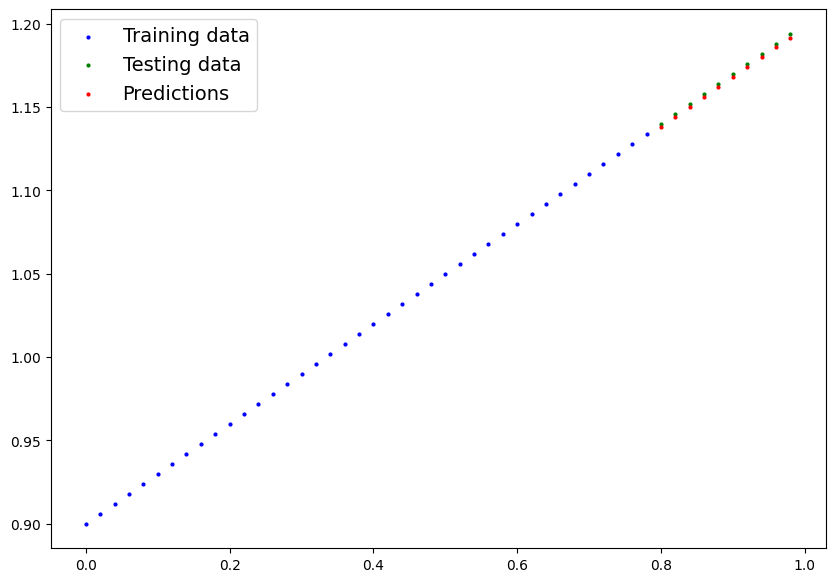

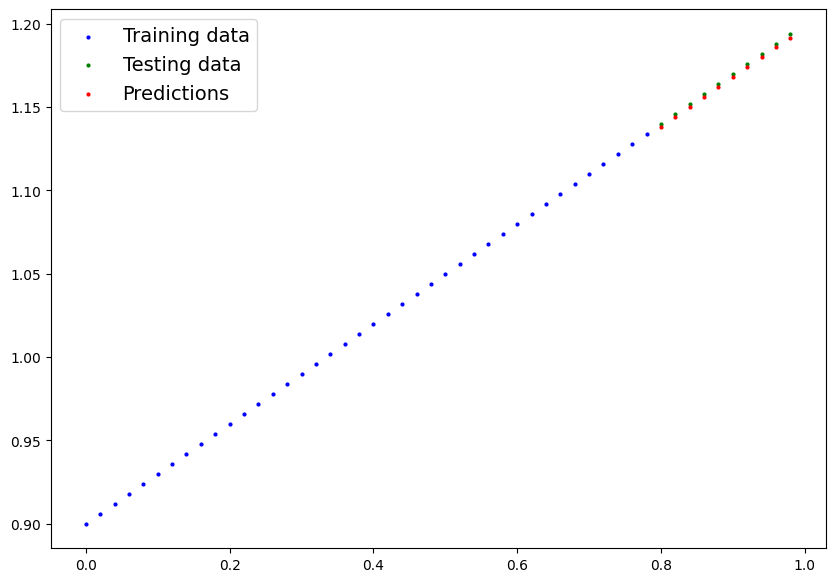

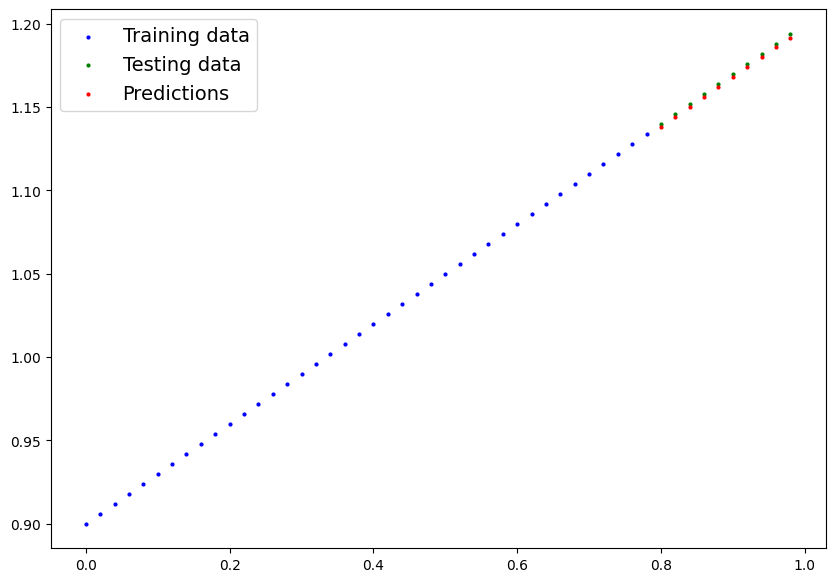

In [ ]:
epochs=300
for epoch in range(epochs):
  model_1.train()
  y_preds=model_1(X_train)
  loss=loss_fn(y_preds,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 20 ==0:
    model_1.eval()
    with torch.inference_mode():
      y_preds=model_1(X_test)
      plot_predictions(predictions=y_preds)


In [ ]:
from